# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

In [1]:
# pip install --upgrade numpy pandas # MAj both


## 1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_clean = pd.read_excel("Online Retail.xlsx")
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

In [3]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data_clean.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data_clean = data_clean.dropna(axis=0)
data_clean = data_clean.drop_duplicates()

In [6]:
data_clean.shape

(401604, 8)

In [7]:
data_clean[["Quantity","UnitPrice"]].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


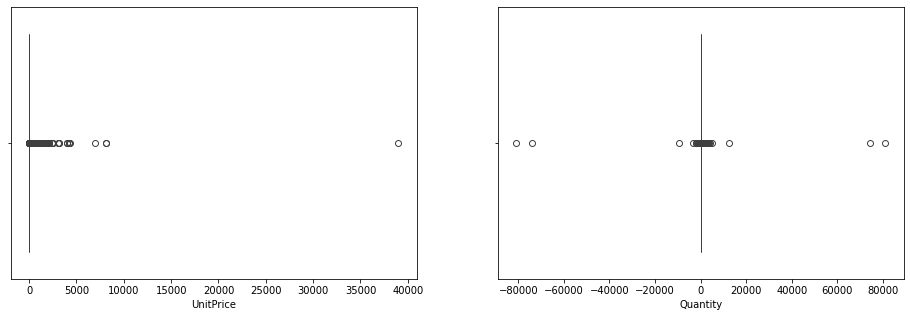

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x= data_clean.UnitPrice)
plt.subplot(1,2,2)
sns.boxplot(x=data_clean.Quantity)
plt.show()

There are clearly outliers. A quantity can't be negative.

In [11]:
# Filering the data in order to remove all negative value
data_clean= data_clean[data_clean.Quantity>0]
data_clean= data_clean[data_clean.UnitPrice>0]

In [12]:
# The new shape of our dataFrame 
data_clean.shape

(392692, 8)

## 3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

In [14]:
print("The mean of Quantity, UnitPrice ", list(data_clean[["Quantity","UnitPrice"]].mean().round(3)))

The mean of Quantity, UnitPrice  [13.12, 3.126]


In [15]:
print("The mode of  Quantity, UnitPrice  = " , data_clean[["Quantity","UnitPrice"]].mode().values)

The mode of  Quantity, UnitPrice  =  [[1.   1.25]]


In [16]:
Q1 = data_clean[["Quantity","UnitPrice"]].quantile(0.25)
Q3 = data_clean[["Quantity","UnitPrice"]].quantile(0.75)
IQR = Q3-Q1
print(IQR)

Quantity     10.0
UnitPrice     2.5
dtype: float64


In [18]:
data_clean[["Quantity","UnitPrice"]].quantile(0.5)

Quantity     6.00
UnitPrice    1.95
Name: 0.5, dtype: float64

In [20]:
data_clean[["Quantity","UnitPrice"]].std()

Quantity     180.492832
UnitPrice     22.241836
dtype: float64

In [21]:
data_clean[["Quantity","UnitPrice"]].var()

Quantity     32577.662399
UnitPrice      494.699251
dtype: float64

## 4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.

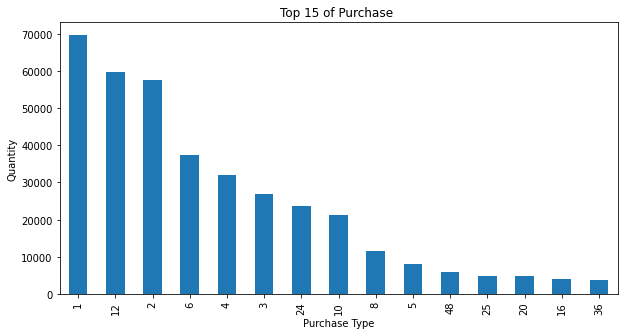

In [22]:
data_clean.Quantity.value_counts().nlargest(15).plot(kind='bar',figsize=(10,5))
plt.title("Top 15 of Purchase ")
plt.xlabel("Purchase Type")
plt.ylabel("Quantity")
plt.show()

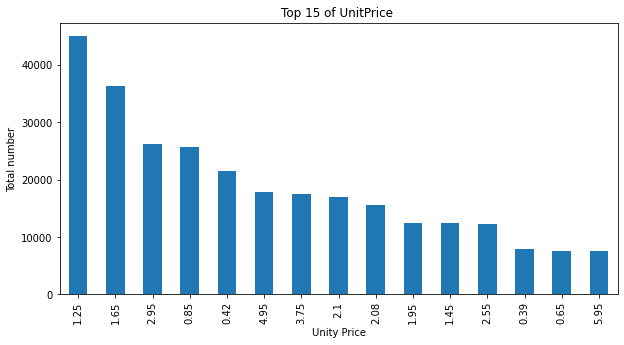

In [23]:
data_clean.UnitPrice.value_counts().nlargest(15).plot(kind='bar',figsize=(10,5))
plt.title("Top 15 of UnitPrice ")
plt.xlabel("Unity Price")
plt.ylabel("Total number")
plt.show()

By the way these graphs confirm the mode calculated before !

## 5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [24]:
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate']) # Important

In [25]:
# Month extraction
data_clean["Month"] = data_clean.InvoiceDate.dt.month

In [26]:
# Day of the week extraction
data_clean["Day of the week"] = data_clean.InvoiceDate.dt.dayofweek

In [27]:
data_clean.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day of the week'],
      dtype='object')

In [28]:
# total sales of month
Monthly_Sales = data_clean.groupby('Month')["UnitPrice"].sum().reset_index()

In [29]:
#Daily sales
Daily_Sales = data_clean.groupby("Day of the week")["UnitPrice"].sum().reset_index()

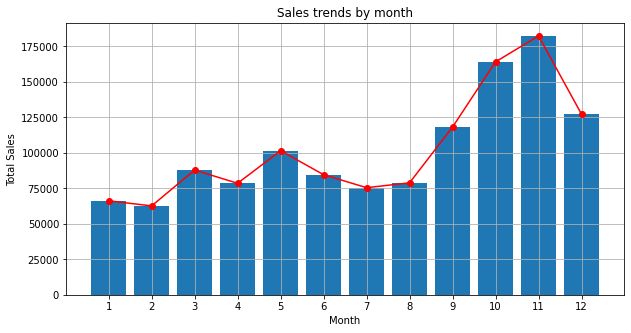

In [30]:
plt.figure(figsize=(10,5))
plt.plot(Monthly_Sales["Month"].to_numpy(), Monthly_Sales["UnitPrice"].to_numpy(), marker="o",c ="red")
plt.bar(Monthly_Sales["Month"].to_numpy(), Monthly_Sales["UnitPrice"].to_numpy())
plt.title("Sales trends by month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.grid()
plt.show()

In [31]:
days = {0 : "monday",1: "tuesday",2:"wednesday", 3:"thursday", 4:"friday",5:"saturday",6:"sunday"}
Daily_Sales['Day of the week'] = Daily_Sales['Day of the week'].map(days) # Renaming

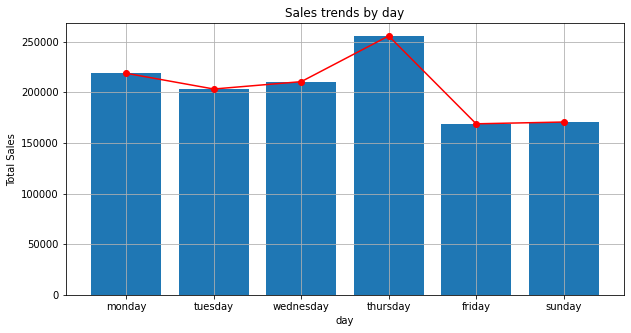

In [32]:
# Trends by day of week
plt.figure(figsize=(10,5))
plt.plot(Daily_Sales['Day of the week'].to_numpy(), Daily_Sales["UnitPrice"].to_numpy(), marker="o", c = "red")
plt.bar(Daily_Sales['Day of the week'].to_numpy(), Daily_Sales["UnitPrice"].to_numpy())
plt.title("Sales trends by day")
plt.xlabel("day")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

## 6. Explore the top-selling products and countries based on the quantity sold.


In [33]:
data_clean.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day of the week'],
      dtype='object')

In [34]:
product_sales = data_clean.groupby('Country')["UnitPrice"].sum().reset_index().sort_values(ascending=False,by = "UnitPrice")

quantity_sales = data_clean.groupby('Country')["Quantity"].sum().reset_index().sort_values(ascending=False,by = "Quantity")


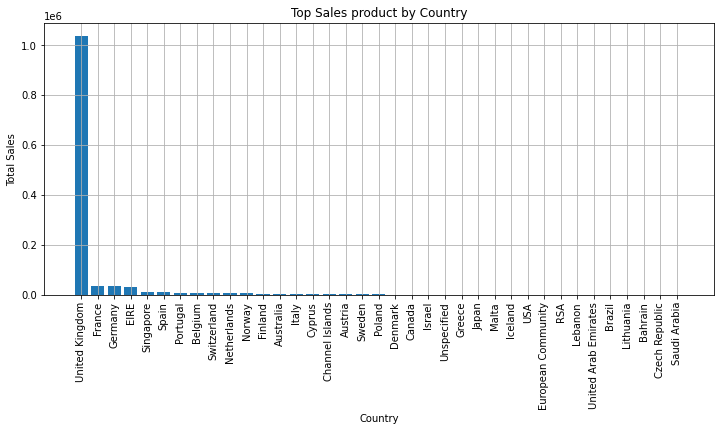

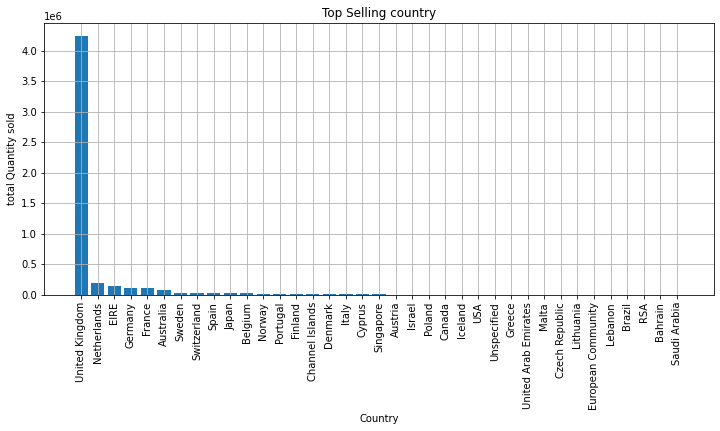

In [35]:
# 
plt.figure(figsize=(12,5))
plt.bar(product_sales['Country'].to_numpy(),product_sales["UnitPrice"].to_numpy())
plt.title("Top Sales product by Country")
plt.xlabel("Country")
plt.xticks(rotation = 90 )
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


# 
plt.figure(figsize=(12,5))
plt.bar(quantity_sales['Country'].to_numpy(),quantity_sales["Quantity"].to_numpy())
plt.title("Top Selling country")
plt.xlabel("Country")
plt.xticks(rotation = 90 )
plt.ylabel("total Quantity sold")
plt.grid(True)
plt.show()

In [36]:
print("Top Sales \n")
print(product_sales,"\n")

Top Sales 

                 Country    UnitPrice
35        United Kingdom  1037945.864
13                France    36788.980
14               Germany    33499.580
10                  EIRE    32134.960
29             Singapore    12949.990
30                 Spain     9492.390
26              Portugal     8636.430
3                Belgium     7372.850
32           Switzerland     6389.270
23           Netherlands     6247.730
24                Norway     5662.470
12               Finland     3628.440
0              Australia     3605.750
18                 Italy     3576.210
7                 Cyprus     3466.150
6        Channel Islands     3388.000
1                Austria     1693.900
31                Sweden     1693.690
25                Poland     1377.210
9                Denmark     1195.550
5                 Canada      910.580
17                Israel      898.590
36           Unspecified      775.950
15                Greece      663.290
19                 Japan      657.210


In [37]:
print("Top selling county :")
print(quantity_sales)

Top selling county :
                 Country  Quantity
35        United Kingdom   4241305
23           Netherlands    200361
10                  EIRE    140133
14               Germany    119154
13                France    111428
0              Australia     83891
31                Sweden     36078
32           Switzerland     30082
30                 Spain     27933
19                 Japan     26016
3                Belgium     23237
24                Norway     19336
26              Portugal     16095
12               Finland     10704
6        Channel Islands      9485
9                Denmark      8235
18                 Italy      8112
7                 Cyprus      6340
29             Singapore      5241
1                Austria      4881
17                Israel      4043
25                Poland      3684
5                 Canada      2763
16               Iceland      2458
33                   USA      2458
36           Unspecified      1785
15                Greece      1557

## 7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

Outliers dans Quantity : 25647 observations
Outliers dans UnitPrice : 34356 observations


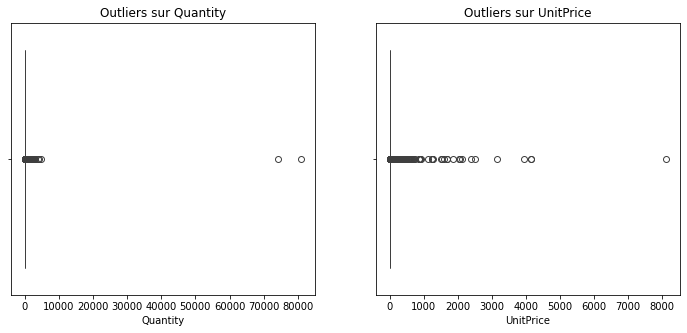


Les valeurs extrêmes sur Quantity et UnitPrice peuvent correspondre à :
- des erreurs de saisie (prix = 0 ou quantité très élevée),
- des ventes exceptionnelles (grosses commandes),
- des produits très chers ou en gros volume.

Impact : 
Ces outliers peuvent fausser la moyenne, les graphiques et les modèles prédictifs.
Il est préférable de les analyser individuellement ou d’utiliser des métriques robustes (médiane, IQR).



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier
df = pd.read_excel("Online Retail.xlsx")

# Nettoyage de base
df = df.dropna(subset=["CustomerID"])  # suppression des lignes sans client
df = df[df["Quantity"] > 0]            # suppression des quantités négatives (retours)
df = df[df["UnitPrice"] > 0]           # suppression des prix unitaires nuls ou négatifs

# Détection des outliers avec l'IQR
def detect_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

outliers_qty = detect_outliers_IQR(df, "Quantity")
outliers_price = detect_outliers_IQR(df, "UnitPrice")

print(f"Outliers dans Quantity : {len(outliers_qty)} observations")
print(f"Outliers dans UnitPrice : {len(outliers_price)} observations")

# Visualisation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df["Quantity"])
plt.title("Outliers sur Quantity")

plt.subplot(1,2,2)
sns.boxplot(x=df["UnitPrice"])
plt.title("Outliers sur UnitPrice")
plt.show()

# Impact potentiel ---
print("""
Les valeurs extrêmes sur Quantity et UnitPrice peuvent correspondre à :
- des erreurs de saisie (prix = 0 ou quantité très élevée),
- des ventes exceptionnelles (grosses commandes),
- des produits très chers ou en gros volume.

Impact : 
Ces outliers peuvent fausser la moyenne, les graphiques et les modèles prédictifs.
Il est préférable de les analyser individuellement ou d’utiliser des métriques robustes (médiane, IQR).
""")


## 8. Draw conclusions and summarize your findings from the exploratory data analysis.

Nombre total de transactions : 18532
Nombre total de clients : 4338
Chiffre d'affaires total : 8911407.9

Top 5 des pays en chiffre d'affaires :
 Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalPrice, dtype: float64


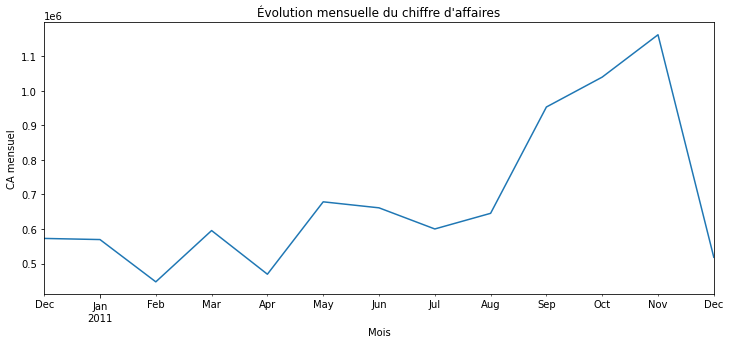


**Conclusions générales :**
- Le dataset couvre les ventes en ligne d'une entreprise britannique (2010–2011).
- La majorité des ventes proviennent du Royaume-Uni.
- Quelques clients passent des commandes très importantes (outliers).
- La saisonnalité montre des pics autour des périodes de Noël.
- Des anomalies existent (prix unitaires = 0 ou quantités négatives), qu’il faut nettoyer avant analyse.

En résumé, le dataset est exploitable après nettoyage, et les analyses doivent tenir compte des valeurs extrêmes.



In [39]:
# Création d'une variable du chiffre d'affaires
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Synthèse générale
print("Nombre total de transactions :", df["InvoiceNo"].nunique())
print("Nombre total de clients :", df["CustomerID"].nunique())
print("Chiffre d'affaires total :", round(df["TotalPrice"].sum(), 2))

# Top 5 des pays
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head()
print("\nTop 5 des pays en chiffre d'affaires :\n", top_countries)

# Analyse temporelle (année ou mois)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.to_period("M")
sales_by_month = df.groupby("Month")["TotalPrice"].sum()

# Visualisation
plt.figure(figsize=(12,5))
sales_by_month.plot(kind="line")
plt.title("Évolution mensuelle du chiffre d'affaires")
plt.ylabel("CA mensuel")
plt.xlabel("Mois")
plt.show()

print("""
**Conclusions générales :**
- Le dataset couvre les ventes en ligne d'une entreprise britannique (2010–2011).
- La majorité des ventes proviennent du Royaume-Uni.
- Quelques clients passent des commandes très importantes (outliers).
- La saisonnalité montre des pics autour des périodes de Noël.
- Des anomalies existent (prix unitaires = 0 ou quantités négatives), qu’il faut nettoyer avant analyse.

En résumé, le dataset est exploitable après nettoyage, et les analyses doivent tenir compte des valeurs extrêmes.
""")


The exploratory data analysis of the Online Retail dataset revealed a strong concentration of sales in the United Kingdom and a clear seasonality pattern around the end-of-year holidays. After cleaning missing and abnormal values, the data showed the presence of outliers related to exceptional orders or data entry errors. Although relatively rare, these anomalies can influence overall statistics and should be handled carefully. Overall, the dataset is reliable and provides a solid foundation for predictive modeling and customer segmentation analyses.